# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3

Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes does not exist. Creating it and continuing withexecution


In [3]:
PH3_IS_W2 = True

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2 does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2 does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2 does not exist. Creating it and continuing withexecution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

person_id  cycle_num  handedness class_name  class_numeric  \
0          p01          1           0          a              0   
1          p01          1           0          a              0   
2          p01          1           0          a              0   
3          p01          1           0          a              0   
4          p01          1           0          a              0   
...        ...        ...         ...        ...            ...   
5001       p11          5           1          b              1   
5002       p11          5           1          b              1   
5003       p11          5           1          b              1   
5004       p11          5           1          b              1   
5005       p11          5           1          b              1   

                                                 fileid  current_frame  \
0         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              0   
1         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              0   
2         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              1   
3         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              1   
4         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              2   
...                                                 ...            ...   
5001  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              9   
5002  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             10   
5003  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             10   
5004  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             11   
5005  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             11   

           h0x       h0y           h0z  ...      cp0z     cp11x     cp11y  \
0     0.356595  0.485021 -1.312914e-07  ... -0.181956 -2.098741  0.873798   
1     0.567594  0.906298  4.943682e-09  ... -0.181956 -3.480238  0.964271   
2     0.352816  0.484037 -1.180915e-07  ... -0.333521 -2.066678  1.008282   
3     0.567833  0.905873  4.337321e-09  ... -0.333521 -3.455541  1.185928   
4     0.351332  0.480660 -1.254345e-07  ... -0.233376 -2.168897  0.905824   
...        ...       ...           ...  ...       ...       ...       ...   
5001  0.405674  0.764709  5.895547e-08  ... -0.084159 -2.557804  1.086794   
5002  0.633578  0.386601 -1.037258e-07  ... -0.062124 -1.350568  0.798976   
5003  0.404680  0.765115  4.365882e-08  ... -0.062124 -2.565837  1.078161   
5004  0.633556  0.386977 -1.034930e-07  ...  0.009736 -1.291110  0.718431   
5005  0.404066  0.765756  5.479360e-08  ...  0.009736 -2.474521  0.950366   

         cp11z     cp12x     cp12y     cp12z  cp_h_mean_x  cp_h_mean_y  \
0     0.027716 -2.306700  1.885125 -0.694826    -2.896234     1.150676   
1     0.265744 -2.306700  1.885125 -0.694826    -2.414786     1.221503   
2    -0.080830 -2.165842  2.062525 -0.801491    -2.825404     1.313214   
3     0.076849 -2.165842  2.062525 -0.801491    -2.343657     1.351576   
4     0.014499 -2.366600  1.999840 -0.726445    -2.981283     1.221755   
...        ...       ...       ...       ...          ...          ...   
5001  0.216372 -1.526016  1.644848 -0.550490    -1.936456     1.060899   
5002  0.045304 -1.538694  1.641183 -0.535136    -1.488300     1.035166   
5003  0.218660 -1.538694  1.641183 -0.535136    -1.948699     1.025206   
5004  0.083880 -1.526755  1.476018 -0.468762    -1.434433     0.942531   
5005  0.295865 -1.526755  1.476018 -0.468762    -1.886699     0.910612   

      cp_h_mean_z  
0       -0.222430  
1       -0.128008  
2       -0.356977  
3       -0.232162  
4       -0.257633  
...           ...  
5001    -0.106899  
5002     0.027075  
5003    -0.083890  
5004     0.069260  
5005    -0.025058  

[5006 rows x 176 columns]

## Sign recognition

### Per frame

In [6]:
prePH3_s_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_S_PF}.csv"))
prePH3_s_frame_df

person_id  cycle_num  handedness class_name  class_numeric  \
0          p01          1           0          a              0   
1          p01          1           0          a              0   
2          p01          1           0          a              0   
3          p01          1           0          a              0   
4          p01          1           0          a              0   
...        ...        ...         ...        ...            ...   
2551       p11          5           1          b              1   
2552       p11          5           1          b              1   
2553       p11          5           1          b              1   
2554       p11          5           1          b              1   
2555       p11          5           1          b              1   

                                                 fileid  current_frame  \
0         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              0   
1         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              1   
2         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              2   
3         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              3   
4         p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4              4   
...                                                 ...            ...   
2551  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              7   
2552  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              8   
2553  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4              9   
2554  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             10   
2555  p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4             11   

           h0x       h0y           h0z  ...      cp0z     cp11x     cp11y  \
0     0.356595  0.485021 -1.312914e-07  ... -0.181956 -2.098741  0.873798   
1     0.352816  0.484037 -1.180915e-07  ... -0.333521 -2.066678  1.008282   
2     0.351332  0.480660 -1.254345e-07  ... -0.233376 -2.168897  0.905824   
3     0.350582  0.477399 -1.209936e-07  ... -0.255433 -2.217161  0.913492   
4     0.349610  0.477152 -1.138834e-07  ... -0.226371 -2.140806  0.910282   
...        ...       ...           ...  ...       ...       ...       ...   
2551  0.634376  0.382406 -6.676932e-08  ...  0.017265 -1.438086  0.700949   
2552  0.635004  0.385360 -7.754188e-08  ...  0.025381 -1.373945  0.701393   
2553  0.634422  0.384731 -9.586294e-08  ... -0.084159 -1.354765  0.795893   
2554  0.633578  0.386601 -1.037258e-07  ... -0.062124 -1.350568  0.798976   
2555  0.633556  0.386977 -1.034930e-07  ...  0.009736 -1.291110  0.718431   

         cp11z     cp12x     cp12y     cp12z  cp_h_mean_x  cp_h_mean_y  \
0     0.027716 -2.306700  1.885125 -0.694826    -2.896234     1.150676   
1    -0.080830 -2.165842  2.062525 -0.801491    -2.825404     1.313214   
2     0.014499 -2.366600  1.999840 -0.726445    -2.981283     1.221755   
3     0.007709 -2.409506  2.035775 -0.750549    -3.045199     1.239745   
4    -0.015083 -2.350921  1.959558 -0.730336    -2.972164     1.171188   
...        ...       ...       ...       ...          ...          ...   
2551  0.108444 -1.705874  1.560864 -0.485020    -1.606003     0.985290   
2552  0.094350 -1.634857  1.503335 -0.473816    -1.537476     0.941414   
2553  0.047558 -1.526016  1.644848 -0.550490    -1.484394     1.070451   
2554  0.045304 -1.538694  1.641183 -0.535136    -1.488300     1.035166   
2555  0.083880 -1.526755  1.476018 -0.468762    -1.434433     0.942531   

      cp_h_mean_z  
0       -0.222430  
1       -0.356977  
2       -0.257633  
3       -0.269562  
4       -0.257730  
...           ...  
2551     0.062647  
2552     0.071554  
2553     0.002889  
2554     0.027075  
2555     0.069260  

[2556 rows x 175 columns]

### Per video

In [7]:
prePH3_s_video_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_S_PV}.csv"))
prePH3_s_video_df

person_id  cycle_num  handedness class_name  class_numeric    f0_h0x  \
0         p01          1           0          a              0  0.356595   
1         p01          1           0          b              1  0.348771   
2         p01          1           1          a              0  0.475774   
3         p01          1           1          b              1  0.673130   
4         p01          2           0          a              0  0.356703   
..        ...        ...         ...        ...            ...       ...   
208       p11          4           1          b              1  0.645514   
209       p11          5           0          a              0  0.352055   
210       p11          5           0          b              1  0.365258   
211       p11          5           1          a              0  0.644268   
212       p11          5           1          b              1  0.637852   

       f0_h0y        f0_h0z    f0_h1x    f0_h1y  ...  f11_cp0z  f11_cp11x  \
0    0.485021 -1.312914e-07  0.373518  0.459913  ... -0.058999  -2.195826   
1    0.466237  4.743118e-08  0.363611  0.446080  ... -0.160177  -2.021350   
2    0.927311 -9.812992e-08  0.494941  0.935337  ... -0.644612  -1.964399   
3    0.452971 -6.348814e-09  0.662367  0.436210  ... -0.532817  -1.907883   
4    0.455645 -1.280792e-07  0.373605  0.434001  ...  0.004046  -2.093710   
..        ...           ...       ...       ...  ...       ...        ...   
208  0.291388 -1.497878e-07  0.628773  0.270614  ... -0.019268  -0.874001   
209  0.521995 -5.147281e-08  0.371064  0.510372  ...  0.127829  -0.776137   
210  0.335842 -5.006000e-08  0.385060  0.323807  ...  0.083438  -0.599103   
211  0.334418 -1.884289e-07  0.624991  0.314313  ... -0.078067  -1.450643   
212  0.365312 -1.264185e-07  0.619819  0.349898  ...  0.009736  -1.291110   

     f11_cp11y  f11_cp11z  f11_cp12x  f11_cp12y  f11_cp12z  f11_cp_h_mean_x  \
0     0.758305   0.120381  -2.498878   1.796790  -0.575941        -3.106573   
1     0.773495   0.047998  -2.356061   1.763877  -0.672998        -2.971662   
2     1.739916  -0.185610  -1.559865   3.232175  -1.054860        -1.728090   
3     1.487157  -0.082033  -1.745100   2.917575  -0.980489        -1.763566   
4     0.708905   0.165053  -2.465204   1.695280  -0.506559        -2.970079   
..         ...        ...        ...        ...        ...              ...   
208   0.544017   0.017931  -1.077997   1.027761  -0.438979        -1.031278   
209   0.577966   0.040399  -0.925767   0.882573  -0.288725        -1.376984   
210   0.539396  -0.020511  -0.814500   0.781035  -0.309411        -1.245915   
211   0.842298   0.087333  -1.500647   1.807713  -0.559489        -1.482214   
212   0.718431   0.083880  -1.526755   1.476018  -0.468762        -1.434433   

     f11_cp_h_mean_y  f11_cp_h_mean_z  
0           0.953093        -0.090265  
1           1.030349        -0.193626  
2           2.489934        -0.456677  
3           2.255293        -0.365618  
4           0.907383        -0.015506  
..               ...              ...  
208         0.685579         0.029543  
209         0.389957         0.091353  
210         0.376465         0.060204  
211         1.144109         0.018063  
212         0.942531         0.069260  

[213 rows x 2021 columns]

# Cleanup

## Drop unnecessary columns

### Active hand detection

In [8]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

In [9]:
PH3_AH_FRM_clean_df = prePH3_ah_frame_df[[sup.active_hand_col]+ah_pf_dataCols]
PH3_AH_FRM_clean_df

active_hand      wh0x      wh0y      wh0z      wh1x      wh1y      wh1z  \
0               1 -1.805903 -0.137558  1.396486 -1.778782 -0.152710  1.386670   
1               0  2.663624  1.025436  2.913183  2.752548  1.025157  2.927318   
2               1 -1.830318 -0.202791  1.436107 -1.794116 -0.217605  1.428846   
3               0  2.682407  1.055953  2.956063  2.772043  1.056247  2.970350   
4               1 -1.753665 -0.221967  1.350179 -1.721510 -0.237148  1.342926   
...           ...       ...       ...       ...       ...       ...       ...   
5001            0 -0.210129  1.669117  0.463588 -0.180967  1.640955  0.445547   
5002            1  1.295826 -0.110650  1.655515  1.277380 -0.098276  1.663450   
5003            0 -0.190895  1.610612  0.464539 -0.160516  1.582748  0.447754   
5004            1  1.278620 -0.107069  1.648367  1.256040 -0.094921  1.655880   
5005            0 -0.172463  1.676197  0.460903 -0.140810  1.646690  0.443898   

          wh2x      wh2y      wh2z  ...  cp_h_mean_z     h_v1x     h_v1y  \
0    -1.935053 -0.169839  1.343689  ...    -0.222430  0.057899 -0.998047   
1     2.469583  0.947626  2.874427  ...    -0.128008 -0.193123  0.967382   
2    -1.957053 -0.243673  1.384467  ...    -0.356977  0.101697 -0.994756   
3     2.485772  0.976487  2.916198  ...    -0.232162 -0.197447  0.966163   
4    -1.865209 -0.261927  1.297678  ...    -0.257633  0.107233 -0.993941   
...        ...       ...       ...  ...          ...       ...       ...   
5001 -0.105666  1.530713  0.425933  ...    -0.106899  0.436674  0.291370   
5002  1.951521 -0.126874  1.543223  ...     0.027075 -0.055901 -0.998172   
5003 -0.090591  1.478425  0.427753  ...    -0.083890  0.460711  0.295946   
5004  1.918052 -0.122319  1.544229  ...     0.069260 -0.054590 -0.998255   
5005 -0.071567  1.536689  0.421999  ...    -0.025058  0.439414  0.279914   

         h_v1z     h_v2x     h_v2y     h_v2z     h_v3x     h_v3y     h_v3z  
0    -0.023436 -0.221157 -0.971920 -0.080376  0.057440  0.009837 -0.276999  
1    -0.163938  0.143440  0.980908 -0.131321  0.033770 -0.048876 -0.328197  
2    -0.010856 -0.171527 -0.982976 -0.065856  0.054840  0.008559 -0.270593  
3    -0.165960  0.134540  0.981961 -0.132856  0.034606 -0.048560 -0.323873  
4    -0.024124 -0.178196 -0.980435 -0.083623  0.059464  0.013266 -0.282252  
...        ...       ...       ...       ...       ...       ...       ...  
5001 -0.851128 -0.140729  0.687971 -0.711963 -0.378107 -0.430674 -0.341423  
5002 -0.022960  0.168659 -0.984704 -0.043723 -0.021034  0.006317 -0.223397  
5003 -0.836756 -0.139121  0.709019 -0.691331 -0.388680 -0.434914 -0.367825  
5004 -0.022497  0.172534 -0.984122 -0.041657 -0.019445  0.006155 -0.225956  
5005 -0.853559 -0.128566  0.688370 -0.713876 -0.387741 -0.423425 -0.338467  

[5006 rows x 85 columns]

### Sign recognition

#### Per frame

In [10]:
if PH3_IS_W2:
  s_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  s_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

In [11]:
PH3_S_FRM_clean_df = prePH3_s_frame_df[[sup.class_numeric_column]+s_pf_dataCols]
PH3_S_FRM_clean_df

class_numeric      wh0x      wh0y      wh0z      wh1x      wh1y  \
0                 0 -1.805903 -0.137558  1.396486 -1.778782 -0.152710   
1                 0 -1.830318 -0.202791  1.436107 -1.794116 -0.217605   
2                 0 -1.753665 -0.221967  1.350179 -1.721510 -0.237148   
3                 0 -1.760675 -0.248811  1.295079 -1.726038 -0.263107   
4                 0 -1.707686 -0.304164  1.361147 -1.672152 -0.318087   
...             ...       ...       ...       ...       ...       ...   
2551              1  1.188074 -0.143107  1.856758  1.177185 -0.128554   
2552              1  1.221940 -0.150490  1.836273  1.209927 -0.136448   
2553              1  1.311415 -0.129558  1.728174  1.295410 -0.116003   
2554              1  1.295826 -0.110650  1.655515  1.277380 -0.098276   
2555              1  1.278620 -0.107069  1.648367  1.256040 -0.094921   

          wh1z      wh2x      wh2y      wh2z  ...  cp_h_mean_z     h_v1x  \
0     1.386670 -1.935053 -0.169839  1.343689  ...    -0.222430  0.057899   
1     1.428846 -1.957053 -0.243673  1.384467  ...    -0.356977  0.101697   
2     1.342926 -1.865209 -0.261927  1.297678  ...    -0.257633  0.107233   
3     1.288849 -1.863864 -0.289535  1.238757  ...    -0.269562  0.122817   
4     1.354324 -1.812639 -0.348911  1.309700  ...    -0.257730  0.148764   
...        ...       ...       ...       ...  ...          ...       ...   
2551  1.865776  1.900716 -0.184291  1.813488  ...     0.062647 -0.087912   
2552  1.845433  1.930292 -0.189340  1.776600  ...     0.071554 -0.085166   
2553  1.736026  1.995737 -0.160619  1.627033  ...     0.002889 -0.075591   
2554  1.663450  1.951521 -0.126874  1.543223  ...     0.027075 -0.055901   
2555  1.655880  1.918052 -0.122319  1.544229  ...     0.069260 -0.054590   

         h_v1y     h_v1z     h_v2x     h_v2y     h_v2z     h_v3x     h_v3y  \
0    -0.998047 -0.023436 -0.221157 -0.971920 -0.080376  0.057440  0.009837   
1    -0.994756 -0.010856 -0.171527 -0.982976 -0.065856  0.054840  0.008559   
2    -0.993941 -0.024124 -0.178196 -0.980435 -0.083623  0.059464  0.013266   
3    -0.992148 -0.023641 -0.163264 -0.982478 -0.089900  0.065968  0.014901   
4    -0.988281 -0.034204 -0.138263 -0.986316 -0.089796  0.055008  0.018088   
...        ...       ...       ...       ...       ...       ...       ...   
2551 -0.995917 -0.020507  0.124124 -0.992064 -0.020042  0.000384  0.004307   
2552 -0.996054 -0.024957  0.128539 -0.991298 -0.028397 -0.003545  0.005626   
2553 -0.996987 -0.017381  0.140964 -0.989426 -0.034122 -0.016822  0.005029   
2554 -0.998172 -0.022960  0.168659 -0.984704 -0.043723 -0.021034  0.006317   
2555 -0.998255 -0.022497  0.172534 -0.984122 -0.041657 -0.019445  0.006155   

         h_v3z  
0    -0.276999  
1    -0.270593  
2    -0.282252  
3    -0.282646  
4    -0.283372  
...        ...  
2551 -0.210832  
2552 -0.212457  
2553 -0.215331  
2554 -0.223397  
2555 -0.225956  

[2556 rows x 85 columns]

#### Per video

In [12]:
if PH3_IS_W2:
  s_pv_dataCols = sup.pv_wrist_hand_landmark_columns+sup.pv_chest_pose_landmark_columns+sup.pv_h_v123_columns
else:
  s_pv_dataCols = sup.pv_hand_landmark_columns+sup.pv_pose_landmark_columns

In [13]:
PH3_S_VID_clean_df = prePH3_s_video_df[[sup.class_numeric_column]+s_pv_dataCols]
PH3_S_VID_clean_df

class_numeric   f0_wh0x   f0_wh0y   f0_wh0z   f0_wh1x   f0_wh1y  \
0                0 -1.805903 -0.137558  1.396486 -1.778782 -0.152710   
1                1 -1.835569 -0.171570  1.810473 -1.707708 -0.169086   
2                0 -3.102049  1.843737  1.977746 -3.019097  1.817322   
3                1  1.347872 -0.348149  2.042111  1.329778 -0.335433   
4                0 -1.729596 -0.164976  1.306786 -1.694571 -0.178994   
..             ...       ...       ...       ...       ...       ...   
208              1  0.832156 -0.150123  0.804199  0.928629 -0.146667   
209              0 -1.581343 -0.301442  0.674552 -1.564578 -0.318872   
210              1 -1.023537 -0.273881  1.191886 -1.005901 -0.290418   
211              0  0.992247 -0.209164  0.943001  1.065202 -0.199864   
212              1  1.192530 -0.220846  1.156170  1.304901 -0.225699   

      f0_wh1z   f0_wh2x   f0_wh2y   f0_wh2z  ...  f10_h_v3z  f11_h_v1x  \
0    1.386670 -1.935053 -0.169839  1.343689  ...  -0.293874   0.124501   
1    1.836075 -2.266966 -0.250722  1.730301  ...  -0.218701   0.103350   
2    1.992723 -2.801153  1.702567  2.050367  ...  -0.329278  -0.355159   
3    2.052156  1.910204 -0.406920  2.008871  ...  -0.202548  -0.162513   
4    1.298259 -1.853004 -0.201809  1.251318  ...  -0.287769   0.174048   
..        ...       ...       ...       ...  ...        ...        ...   
208  0.778210  1.138541 -0.162034  0.725495  ...  -0.295515  -0.169362   
209  0.674317 -1.531248 -0.318966  0.622883  ...  -0.306568   0.195754   
210  1.192421 -1.268513 -0.356546  1.100006  ...  -0.227437   0.249343   
211  0.924452  1.260734 -0.214867  0.896515  ...  -0.309899  -0.216523   
212  1.139737  1.612709 -0.277486  1.050026  ...  -0.223397  -0.054590   

     f11_h_v1y  f11_h_v1z  f11_h_v2x  f11_h_v2y  f11_h_v2z  f11_h_v3x  \
0    -0.992121   0.014012  -0.169716  -0.985171  -0.025207   0.038813   
1    -0.994645  -0.000690  -0.117723  -0.991853  -0.048674   0.047729   
2    -0.921283  -0.158430  -0.040756  -0.988878  -0.143036   0.024891   
3    -0.986020   0.036794   0.042120  -0.995411   0.085925   0.048098   
4    -0.983380  -0.051686  -0.109899  -0.991257  -0.073018   0.020570   
..         ...        ...        ...        ...        ...        ...   
208  -0.985035   0.031985   0.106416  -0.993616  -0.037462  -0.068682   
209  -0.977849  -0.074106  -0.116242  -0.986194  -0.117935   0.042240   
210  -0.968029  -0.027347   0.024008  -0.997937  -0.059543   0.030348   
211  -0.973350  -0.075553   0.121483  -0.987075  -0.104523  -0.027161   
212  -0.998255  -0.022497   0.172534  -0.984122  -0.041657  -0.019445   

     f11_h_v3y  f11_h_v3z  
0     0.000760  -0.291034  
1     0.005112  -0.219601  
2     0.044344  -0.313661  
3    -0.015514  -0.203298  
4     0.018389  -0.280599  
..         ...        ...  
208   0.002941  -0.273105  
209   0.031700  -0.306718  
210   0.014190  -0.225589  
211   0.031810  -0.331969  
212   0.006155  -0.225956  

[213 rows x 1009 columns]

## Standardize data

In [14]:
from sklearn.preprocessing import StandardScaler

### Active hand detection

In [15]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = PH3_AH_FRM_clean_df[[sup.active_hand_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(PH3_AH_FRM_clean_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/3356107724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(PH3_AH_FRM_clean_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/3356107724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(PH3_AH_FRM_clean_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykern

active_hand      wh0x      wh0y      wh0z      wh1x      wh1y      wh1z  \
0               1 -1.201585 -0.695849  0.027930 -1.210027 -0.716975  0.017713   
1               0  1.600955  0.668264  1.163521  1.619507  0.661846  1.167363   
2               1 -1.216894 -0.772363  0.057595 -1.219601 -0.792942  0.049185   
3               0  1.612733  0.704059  1.195625  1.631681  0.698241  1.199473   
4               1 -1.168830 -0.794856 -0.006741 -1.174264 -0.815819 -0.014929   
...           ...       ...       ...       ...       ...       ...       ...   
5001            0 -0.200983  1.423259 -0.670555 -0.212290  1.382704 -0.684564   
5002            1  0.743301 -0.664289  0.221872  0.698357 -0.653254  0.224250   
5003            0 -0.188922  1.354637 -0.669842 -0.199520  1.314567 -0.682917   
5004            1  0.732512 -0.660089  0.216520  0.685031 -0.649327  0.218601   
5005            0 -0.177365  1.431563 -0.672565 -0.187215  1.389418 -0.685795   

          wh2x      wh2y      wh2z  ...  cp_h_mean_z     h_v1x     h_v1y  \
0    -1.301888 -0.677481  0.058571  ...    -1.190547  0.144624 -1.052542   
1     1.401092  0.678871  1.268367  ...    -0.627160 -0.597281  1.230006   
2    -1.315389 -0.767098  0.090798  ...    -1.993344  0.274069 -1.048720   
3     1.411027  0.713902  1.301380  ...    -1.248616 -0.610061  1.228591   
4    -1.259027 -0.789254  0.022206  ...    -1.400593  0.290432 -1.047773   
...        ...       ...       ...  ...          ...       ...       ...   
5001 -0.179253  1.386609 -0.666765  ...    -0.501213  1.264105  0.444921   
5002  1.083174 -0.625330  0.216269  ...     0.298163 -0.191717 -1.052687   
5003 -0.170002  1.323142 -0.665327  ...    -0.363924  1.335148  0.450235   
5004  1.062636 -0.619801  0.217064  ...     0.549870 -0.187842 -1.052783   
5005 -0.158328  1.393861 -0.669875  ...    -0.012896  1.272204  0.431616   

         h_v1z     h_v2x     h_v2y     h_v2z     h_v3x     h_v3y     h_v3z  
0     0.949354 -1.128392 -1.058306  0.853374  0.395291  0.417724 -0.050689  
1     0.398494  0.555939  1.079430  0.619193  0.260344  0.089914 -0.305942  
2     0.998680 -0.899116 -1.070409  0.920118  0.380465  0.410592 -0.018753  
3     0.390564  0.514821  1.080583  0.612138  0.265111  0.091679 -0.284382  
4     0.946659 -0.929924 -1.067628  0.838448  0.406830  0.436870 -0.076876  
...        ...       ...       ...       ...       ...       ...       ...  
5001 -2.295753 -0.756838  0.758756 -2.049851 -2.087809 -2.041749 -0.371880  
5002  0.951223  0.672443 -1.072301  1.021858 -0.052100  0.398069  0.216546  
5003 -2.239405 -0.749408  0.781796 -1.955011 -2.148083 -2.065422 -0.503508  
5004  0.953039  0.690341 -1.071664  1.031353 -0.043040  0.397170  0.203790  
5005 -2.305284 -0.700646  0.759192 -2.058644 -2.142730 -2.001278 -0.357140  

[5006 rows x 85 columns]

### Sign recognition

#### Per Frame

In [16]:
s_pf_scaler = StandardScaler()

PH3_S_FRM_std_df = PH3_S_FRM_clean_df[[sup.class_numeric_column]]
PH3_S_FRM_std_df[s_pf_dataCols] = s_pf_scaler.fit_transform(PH3_S_FRM_clean_df[s_pf_dataCols])

PH3_S_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/3017513967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_FRM_std_df[s_pf_dataCols] = s_pf_scaler.fit_transform(PH3_S_FRM_clean_df[s_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/3017513967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_FRM_std_df[s_pf_dataCols] = s_pf_scaler.fit_transform(PH3_S_FRM_clean_df[s_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/3

class_numeric      wh0x      wh0y      wh0z      wh1x      wh1y  \
0                 0 -1.188690  0.388546  0.367705 -1.219422  0.329188   
1                 0 -1.204920  0.184484  0.410707 -1.229711  0.127141   
2                 0 -1.153964  0.124495  0.317446 -1.180988  0.066294   
3                 0 -1.158624  0.040524  0.257645 -1.184027 -0.014527   
4                 0 -1.123399 -0.132634  0.329351 -1.147865 -0.185702   
...             ...       ...       ...       ...       ...       ...   
2551              1  0.801585  0.371187  0.867257  0.764245  0.404396   
2552              1  0.824098  0.348092  0.845023  0.786217  0.379817   
2553              1  0.883577  0.413570  0.727700  0.843583  0.443473   
2554              1  0.873214  0.472718  0.648840  0.831483  0.498665   
2555              1  0.861776  0.483920  0.641081  0.817163  0.509110   

          wh1z      wh2x      wh2y      wh2z  ...  cp_h_mean_z     h_v1x  \
0     0.347996 -1.153764  0.429844  0.441940  ...    -1.337287  0.187362   
1     0.393491 -1.166356  0.197693  0.487800  ...    -2.229984  0.365120   
2     0.300811 -1.113788  0.140299  0.390193  ...    -1.570855  0.387590   
3     0.242479 -1.113018  0.053493  0.323927  ...    -1.649997  0.450838   
4     0.313106 -1.083699 -0.133198  0.403714  ...    -1.571494  0.556149   
...        ...       ...       ...       ...  ...          ...       ...   
2551  0.864796  1.041693  0.384405  0.970298  ...     0.554150 -0.404432   
2552  0.842853  1.058621  0.368528  0.928812  ...     0.613245 -0.393285   
2553  0.724838  1.096080  0.458836  0.760601  ...     0.157667 -0.354422   
2554  0.646552  1.070772  0.564939  0.666345  ...     0.318132 -0.274510   
2555  0.638387  1.051615  0.579260  0.667476  ...     0.598025 -0.269189   

         h_v1y     h_v1z     h_v2x     h_v2y     h_v2z     h_v3x     h_v3y  \
0    -0.382155  0.570600 -1.467917 -0.339318  0.549888  0.409546 -0.433550   
1    -0.375709  0.655262 -1.172967 -0.359027  0.651775  0.387223 -0.447715   
2    -0.374112  0.565974 -1.212600 -0.354498  0.527103  0.426918 -0.395525   
3    -0.370599  0.569227 -1.123857 -0.358140  0.483058  0.482740 -0.377396   
4    -0.363025  0.498140 -0.975281 -0.364983  0.483786  0.388663 -0.342058   
...        ...       ...       ...       ...       ...       ...       ...   
2551 -0.377983  0.590315  0.584078 -0.375230  0.973247 -0.080213 -0.494864   
2552 -0.378251  0.560367  0.610320 -0.373864  0.914620 -0.113937 -0.480237   
2553 -0.380079  0.611350  0.684161 -0.370528  0.874451 -0.227899 -0.486858   
2554 -0.382400  0.573808  0.848751 -0.362109  0.807083 -0.264054 -0.472586   
2555 -0.382563  0.576924  0.871776 -0.361072  0.821577 -0.250413 -0.474371   

         h_v3z  
0    -0.338517  
1    -0.304631  
2    -0.366305  
3    -0.368394  
4    -0.372230  
...        ...  
2551  0.011518  
2552  0.002920  
2553 -0.012284  
2554 -0.054954  
2555 -0.068490  

[2556 rows x 85 columns]

#### Per video

In [17]:
s_pv_scaler = StandardScaler()

PH3_S_VID_std_df = PH3_S_VID_clean_df[[sup.class_numeric_column]]
PH3_S_VID_std_df[s_pv_dataCols] = s_pv_scaler.fit_transform(PH3_S_VID_clean_df[s_pv_dataCols])

PH3_S_VID_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/2466599604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_VID_std_df[s_pv_dataCols] = s_pv_scaler.fit_transform(PH3_S_VID_clean_df[s_pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/2466599604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_S_VID_std_df[s_pv_dataCols] = s_pv_scaler.fit_transform(PH3_S_VID_clean_df[s_pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_12684/2

class_numeric   f0_wh0x   f0_wh0y   f0_wh0z   f0_wh1x   f0_wh1y  \
0                0 -1.134853  0.118566  0.551656 -1.154126  0.079634   
1                1 -1.153664  0.040232  0.967620 -1.109019  0.042008   
2                0 -1.956735  4.681653  1.135692 -1.941285  4.606010   
3                1  0.864945 -0.366444  1.200365  0.818704 -0.340194   
4                0 -1.086467  0.055419  0.461527 -1.100682  0.019243   
..             ...       ...       ...       ...       ...       ...   
208              1  0.537931  0.089626 -0.043460  0.564117  0.093519   
209              0 -0.992460 -0.258873 -0.173727 -1.018183 -0.302142   
210              1 -0.638758 -0.195397  0.346079 -0.663622 -0.236766   
211              0  0.639444 -0.046349  0.096005  0.650793 -0.028707   
212              1  0.766443 -0.073253  0.310192  0.802916 -0.088066   

      f0_wh1z   f0_wh2x   f0_wh2y   f0_wh2z  ...  f10_h_v3z  f11_h_v1x  \
0    0.535952 -1.143513  0.148606  0.618967  ...  -0.405667   0.479331   
1    0.985487 -1.332804 -0.044277  1.024191  ...   0.151367   0.381691   
2    1.142179 -1.637452  4.613781  1.359665  ...  -0.668015  -1.734936   
3    1.201630  1.049440 -0.416766  1.316172  ...   0.271063  -0.845616   
4    0.447515 -1.096721  0.072367  0.522149  ...  -0.360434   0.708057   
..        ...       ...       ...       ...  ...        ...        ...   
208 -0.072683  0.609360  0.167219 -0.028988  ...  -0.417830  -0.877237   
209 -0.176605 -0.913223 -0.207018 -0.136540  ...  -0.499734   0.808259   
210  0.341647 -0.763385 -0.296637  0.363552  ...   0.086637   1.055645   
211  0.073601  0.679046  0.041228  0.150265  ...  -0.524419  -1.094944   
212  0.288948  0.879778 -0.108101  0.311167  ...   0.116572  -0.347410   

     f11_h_v1y  f11_h_v1z  f11_h_v2x  f11_h_v2y  f11_h_v2z  f11_h_v3x  \
0    -0.231749   1.290392  -1.272613  -0.205239   1.132431   0.372102   
1    -0.240463   1.098906  -0.928076  -0.226489   0.902702   0.491230   
2     0.012782  -0.955596  -0.418046  -0.217029  -0.021080   0.186082   
3    -0.210691   1.587121   0.131142  -0.237804   2.220383   0.496161   
4    -0.201577   0.434706  -0.876229  -0.224594   0.664383   0.128353   
..         ...        ...        ...        ...        ...        ...   
208  -0.207289   1.524482   0.557207  -0.232095   1.012462  -1.064184   
209  -0.182484   0.142692  -0.918259  -0.208494   0.224653   0.417891   
210  -0.148586   0.751704   0.011119  -0.245837   0.796297   0.259002   
211  -0.166953   0.123846   0.657044  -0.211295   0.355955  -0.509405   
212  -0.252927   0.814879   0.995338  -0.201906   0.971393  -0.406305   

     f11_h_v3y  f11_h_v3z  
0    -0.715104  -0.372004  
1    -0.633771   0.206597  
2     0.099522  -0.555286  
3    -1.019282   0.338644  
4    -0.385606  -0.287485  
..         ...        ...  
208  -0.674344  -0.226786  
209  -0.136795  -0.499050  
210  -0.464085   0.158094  
211  -0.134749  -0.703578  
212  -0.614260   0.155120  

[213 rows x 1009 columns]

## Write out clean and standardized data

In [18]:
PH3_SUB2_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, sup.PH3_SCALED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_DATA_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/scale does not exist. Creating it and continuing withexecution


### Active hand detection

In [19]:
PH3_AH_FRM_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, f"{sup.DATA_AH_PF}.csv"), index=False)

### Sign recognition

#### Per frame

In [20]:
PH3_S_FRM_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, f"{sup.DATA_S_PF}.csv"), index=False)

#### Per video

In [21]:
PH3_S_VID_std_df.to_csv(os.path.join(PH3_SUB2_DATA_ROOT, f"{sup.DATA_S_PV}.csv"), index=False)

## Save standardizers

In [22]:
PH3_SUB2_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, sup.PH3_SCALED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/scale does not exist. Creating it and continuing withexecution


### Active hand detection

In [23]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, f"{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

### Sign recognition

### Per frame

In [24]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, f"{sup.DATA_S_PF}.pkl"), 'wb') as f:
  pickle.dump(s_pf_scaler, f)

### Per video

In [25]:
with open(os.path.join(PH3_SUB2_BINGEN_ROOT, f"{sup.DATA_S_PV}.pkl"), 'wb') as f:
  pickle.dump(s_pv_scaler, f)

# Dimensionality Reduction

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
PH3_SUB2_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_DATA_ROOT)

PH3_SUB2_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

PH3_SUB2_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, sup.PH3_REDUCED_CODE)
sup.create_dir_if_not_exists(PH3_SUB2_BINGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce exists. Continuing with execution


In [28]:
def plot3d(data, origin_df, label_col, title, reducer_name, kernel_name=""):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Convert labels to categorical codes for coloring
    labels_cat = origin_df[label_col].astype('category')
    colors = labels_cat.cat.codes
    cmap = plt.cm.Spectral

    sc = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=cmap, s=20)

    # Add legend by plotting invisible points for each category/color
    for i, category in enumerate(labels_cat.cat.categories):
        ax.scatter([], [], [], color=cmap(i / len(labels_cat.cat.categories)), label=category)
    ax.legend(title=label_col)

    ax.set_title(title)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB2_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    fig_path = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{title}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')

    plt.show()

def visualize(reducer, origin_df, label_col, title, reducer_name, kernel_name=""):
    reduced_data = reducer.fit_transform(origin_df)
    plot3d(reduced_data, origin_df, label_col, title, reducer_name, kernel_name)

def writeout(reducer_arch, reducer_name, origin_df, label_cols, filename, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if kernel_name != "":
            reducer = KernelPCA(kernel=kernel_name,n_components=n, random_state=42)
        else:
            reducer = reducer_arch(n_components=n, random_state=42)

        reduced_data = reducer.fit_transform(origin_df)

        reduced_df = pd.DataFrame(reduced_data)
        reduced_df[label_cols] = origin_df[label_cols]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB2_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB2_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{filename}{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{filename}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [29]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()
PH3_S_FRM_PCA_df = PH3_S_FRM_std_df.copy()
PH3_S_VID_PCA_df = PH3_S_VID_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/pca/ does not exist. Creating it and continuing withexecution


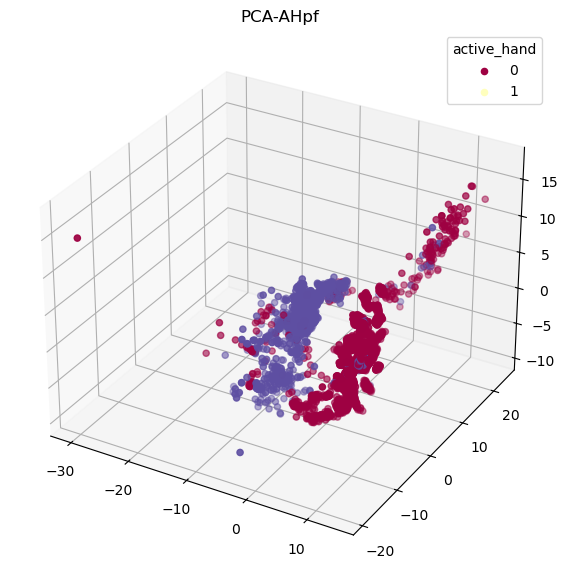

In [30]:
ah_frm_PCA = PCA(n_components=3)
visualize(ah_frm_PCA, PH3_AH_FRM_PCA_df, label_col=sup.active_hand_col, title=f"PCA-{sup.DATA_AH_PF}", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [31]:
ah_frm_big_PCA = PCA(n_components=40)
ah_frm_big_PCA.fit(PH3_AH_FRM_PCA_df)
ah_frm_big_PCA.explained_variance_ratio_

array([3.23539882e-01, 2.44409282e-01, 2.40355998e-01, 8.42941583e-02,
       3.73246714e-02, 1.52362219e-02, 1.36293338e-02, 1.20929099e-02,
       7.92493773e-03, 6.09896362e-03, 3.94879919e-03, 2.73161850e-03,
       2.17701743e-03, 1.81805767e-03, 1.14970209e-03, 8.68031378e-04,
       8.33111064e-04, 3.62659504e-04, 2.52555774e-04, 2.31485648e-04,
       1.69778556e-04, 1.24327823e-04, 9.93757805e-05, 7.17996915e-05,
       6.93744065e-05, 3.31641662e-05, 2.96164177e-05, 2.41491782e-05,
       2.12748608e-05, 1.79805968e-05, 8.59215140e-06, 7.41434969e-06,
       6.93238532e-06, 5.23334707e-06, 4.30651142e-06, 4.02816029e-06,
       3.79664312e-06, 3.01724610e-06, 2.77346276e-06, 2.15165773e-06])

#### Writeout

In [32]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_AH_FRM_PCA_df, [sup.active_hand_col], f"{sup.DATA_AH_PF}")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-

### Sign Recognition

#### Per frame

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution


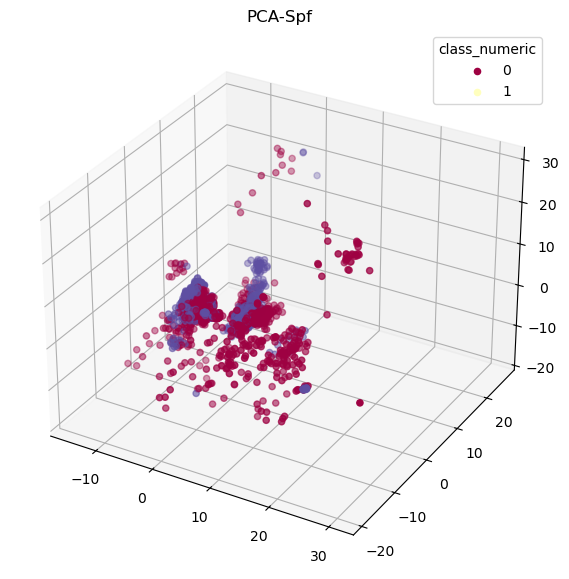

In [33]:
s_frm_PCA = PCA(n_components=3)
visualize(s_frm_PCA, PH3_S_FRM_PCA_df, label_col=sup.class_numeric_column, title=f"PCA-{sup.DATA_S_PF}", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [34]:
s_frm_big_PCA = PCA(n_components=40)
s_frm_big_PCA.fit(PH3_S_FRM_PCA_df)
s_frm_big_PCA.explained_variance_ratio_

array([3.37589385e-01, 2.66956841e-01, 2.01252456e-01, 8.31495315e-02,
       3.63502804e-02, 2.21202774e-02, 1.31094571e-02, 1.05612784e-02,
       7.09356166e-03, 5.04888284e-03, 3.96122686e-03, 2.76187141e-03,
       2.35162501e-03, 1.94722312e-03, 1.44915728e-03, 1.04990395e-03,
       1.02446907e-03, 7.06705792e-04, 2.91455450e-04, 2.61093450e-04,
       2.06887715e-04, 1.59777100e-04, 1.57484793e-04, 7.68540401e-05,
       6.16506053e-05, 5.89244411e-05, 3.93450162e-05, 3.24802367e-05,
       2.68897165e-05, 2.36306516e-05, 2.06921284e-05, 1.57280806e-05,
       1.11034151e-05, 8.87903341e-06, 8.40726756e-06, 7.52090418e-06,
       7.15512028e-06, 6.26695154e-06, 5.37541669e-06, 4.20191561e-06])

##### Writeout

In [35]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_S_FRM_PCA_df, [sup.class_numeric_column], f"{sup.DATA_S_PF}")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with

#### Per video

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution


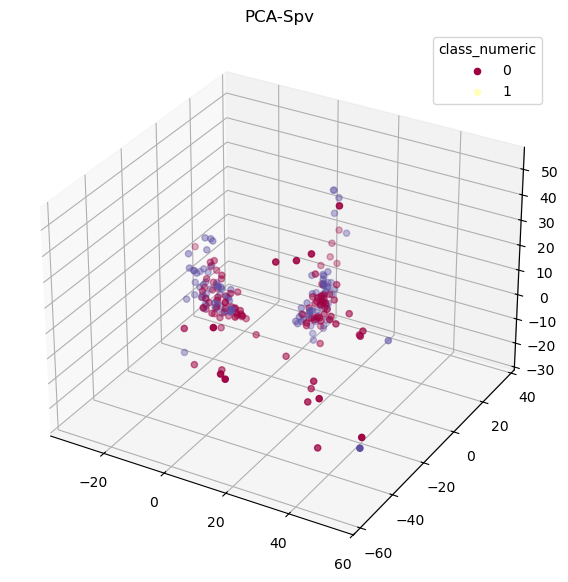

In [36]:
s_vid_PCA = PCA(n_components=3)
visualize(s_vid_PCA, PH3_S_VID_PCA_df, label_col=sup.class_numeric_column, title=f"PCA-{sup.DATA_S_PV}", reducer_name=sup.PH3_REDUCER_NAME_PCA)

In [37]:
s_vid_big_PCA = PCA(n_components=40)
s_vid_big_PCA.fit(PH3_S_VID_PCA_df)
s_vid_big_PCA.explained_variance_ratio_

array([0.27422699, 0.22239551, 0.09624328, 0.07757563, 0.04862998,
       0.03919093, 0.03158383, 0.02750639, 0.02297079, 0.01638457,
       0.0150822 , 0.01338893, 0.00966759, 0.00898836, 0.00870079,
       0.00696638, 0.0066647 , 0.00622406, 0.00553026, 0.0050205 ,
       0.00439059, 0.00386212, 0.00361567, 0.00343571, 0.0032858 ,
       0.00280354, 0.00239872, 0.00228288, 0.00196123, 0.00191383,
       0.00182282, 0.00166775, 0.00154607, 0.00137865, 0.00128272,
       0.00115474, 0.00110644, 0.0010308 , 0.00087929, 0.0008681 ])

##### Writeout

In [38]:
writeout(PCA, sup.PH3_REDUCER_NAME_PCA, PH3_S_VID_PCA_df, sup.class_numeric_column, f"{sup.DATA_S_PV}")

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/pca/ exists. Continuing with

## Kernel PCA

In [39]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()
PH3_S_FRM_KPCA_df = PH3_S_FRM_std_df.copy()
PH3_S_VID_KPCA_df = PH3_S_VID_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/poly does not exist. Creating it and continuing withexecution


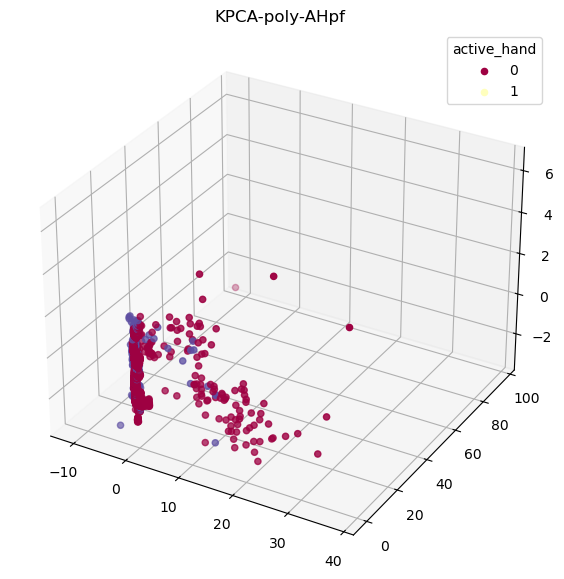

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/rbf does not exist. Creating it and continuing withexecution


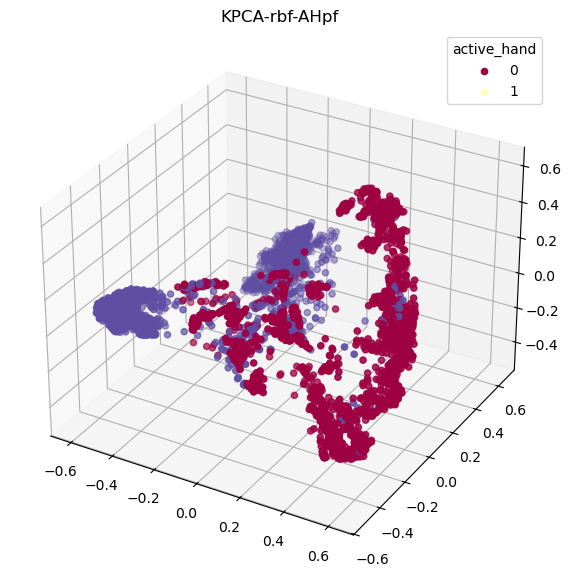

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/sigmoid does not exist. Creating it and continuing withexecution


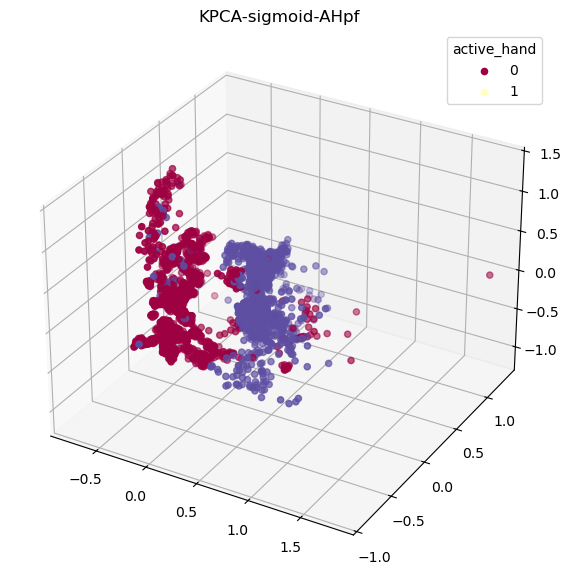

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/cosine does not exist. Creating it and continuing withexecution


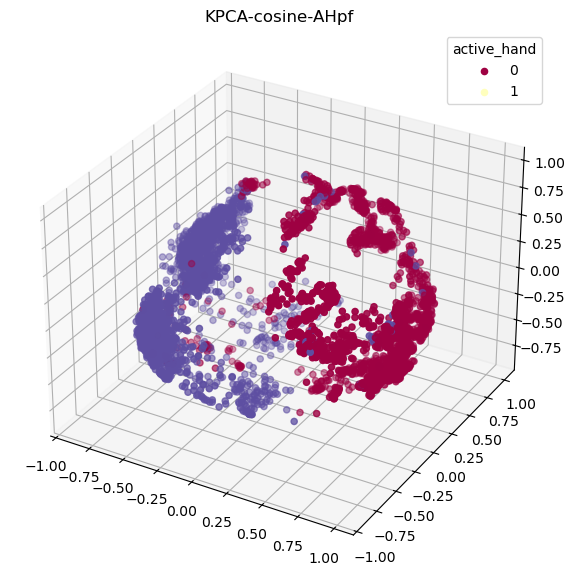

In [40]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  ah_frm_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(ah_frm_KPCA, PH3_AH_FRM_KPCA_df, label_col=sup.active_hand_col, title=f"KPCA-{kernel_name}-{sup.DATA_AH_PF}", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [41]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(KernelPCA, sup.PH3_REDUCER_NAME_KPCA, PH3_AH_FRM_KPCA_df, [sup.active_hand_col], f"{sup.DATA_AH_PF}", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Use

### Sign Recognition

#### Per frame

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution


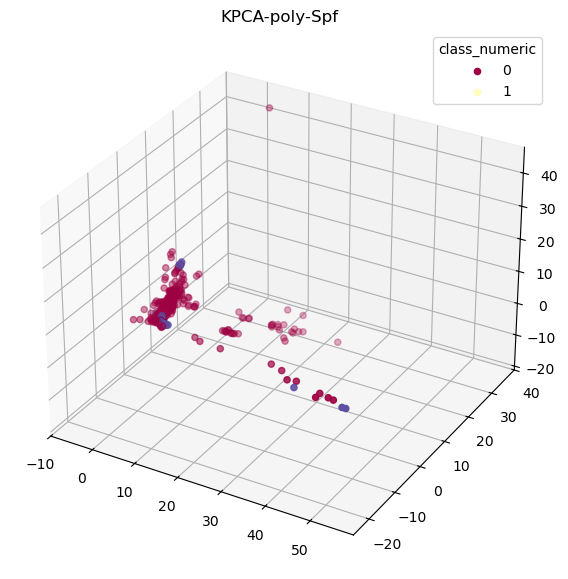

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/rbf exists. Continuing with execution


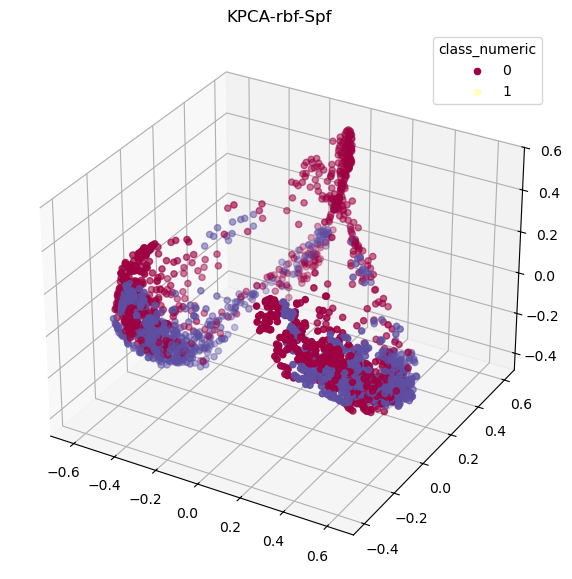

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/sigmoid exists. Continuing with execution


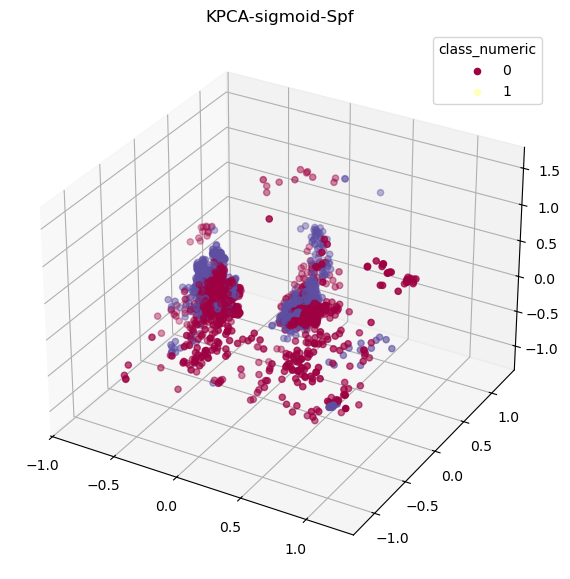

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/cosine exists. Continuing with execution


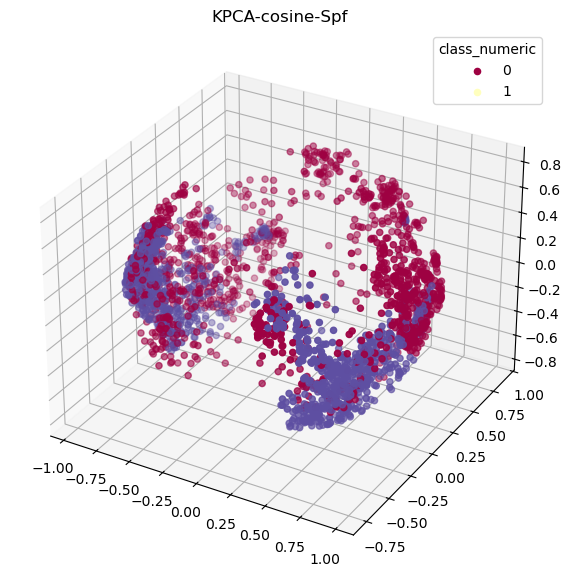

In [42]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  s_frm_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(s_frm_KPCA, PH3_S_FRM_KPCA_df, label_col=sup.class_numeric_column, title=f"KPCA-{kernel_name}-{sup.DATA_S_PF}", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

##### Writeout

In [43]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(KernelPCA, sup.PH3_REDUCER_NAME_KPCA, PH3_S_FRM_KPCA_df, [sup.class_numeric_column], f"{sup.DATA_S_PF}", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classe

#### Per video

##### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution


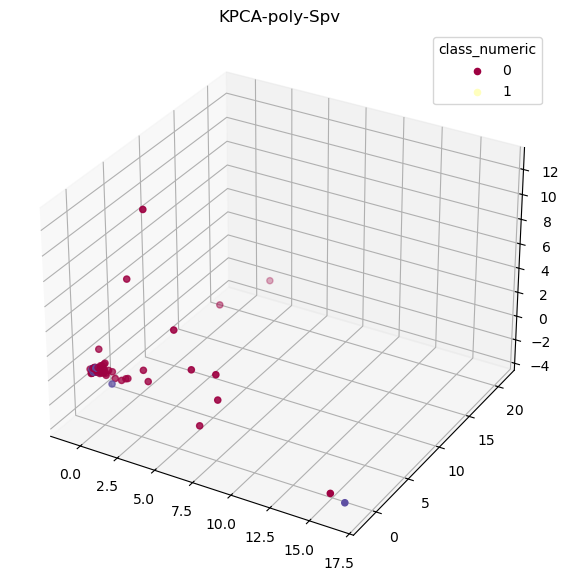

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/rbf exists. Continuing with execution


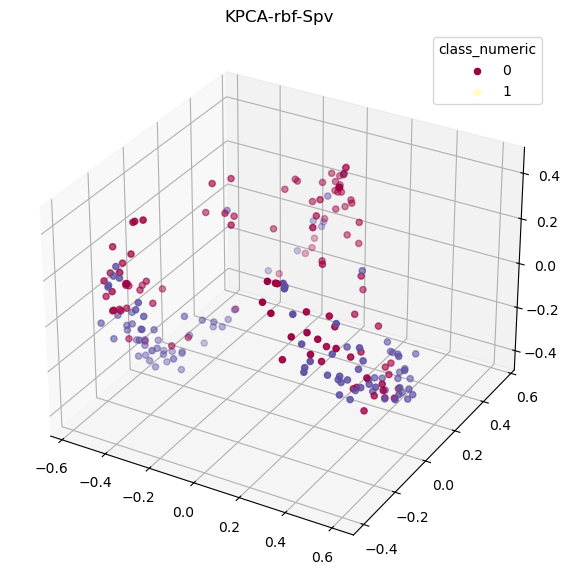

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/sigmoid exists. Continuing with execution


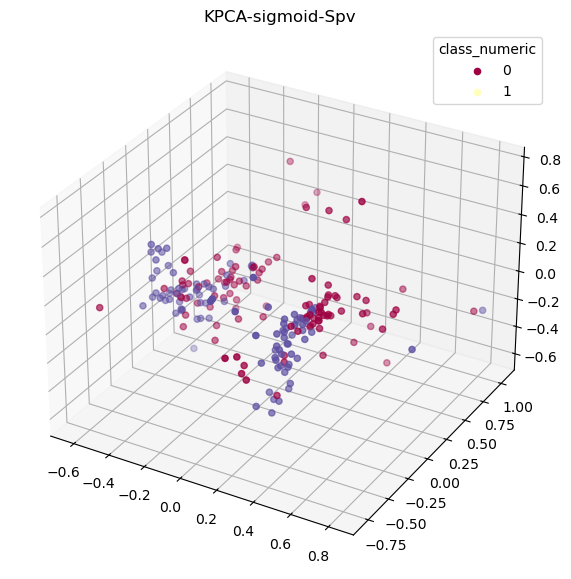

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/kpca/cosine exists. Continuing with execution


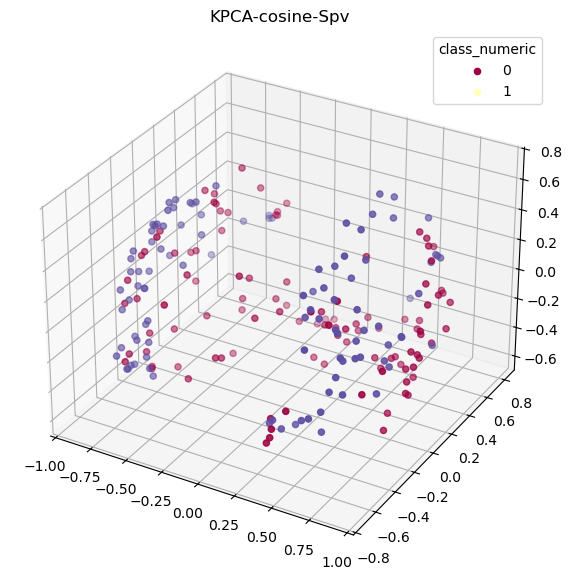

In [44]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  s_vid_KPCA = KernelPCA(kernel=kernel_name, n_components=3)
  visualize(s_vid_KPCA, PH3_S_VID_KPCA_df, label_col=sup.class_numeric_column, title=f"KPCA-{kernel_name}-{sup.DATA_S_PV}", reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

##### Writeout

In [45]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(KernelPCA, sup.PH3_REDUCER_NAME_KPCA, PH3_S_VID_PCA_df, sup.class_numeric_column, f"{sup.DATA_S_PV}", kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classe

## UMAP

In [46]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()
PH3_S_FRM_UMAP_df = PH3_S_FRM_std_df.copy()
PH3_S_VID_UMAP_df = PH3_S_VID_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/umap/ does not exist. Creating it and continuing withexecution


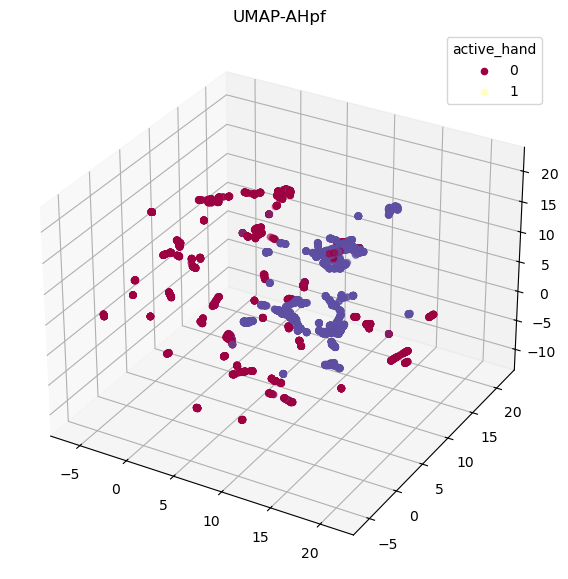

In [47]:
ah_frm_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(ah_frm_UMAP, PH3_AH_FRM_UMAP_df, label_col=sup.active_hand_col, title=f"UMAP-{sup.DATA_AH_PF}", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

#### Writeout

In [48]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_AH_FRM_UMAP_df, [sup.active_hand_col], f"{sup.DATA_AH_PF}")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ does not exist. Creating it and continuing withexecution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ does not exist. Creating it and continuing withexecution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


### Sign Recognition

#### Per frame

##### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


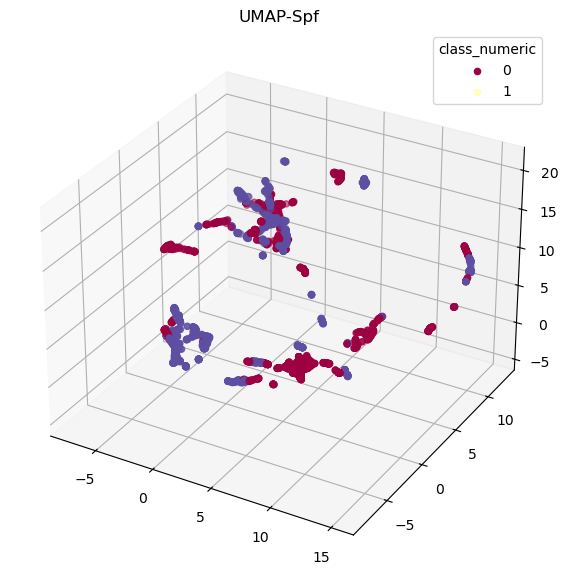

In [49]:
s_frm_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(s_frm_UMAP, PH3_S_FRM_UMAP_df, label_col=sup.class_numeric_column, title=f"UMAP-{sup.DATA_S_PF}", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

##### Writeout

In [50]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_S_FRM_UMAP_df, [sup.class_numeric_column], f"{sup.DATA_S_PF}")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


#### Per Video

##### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


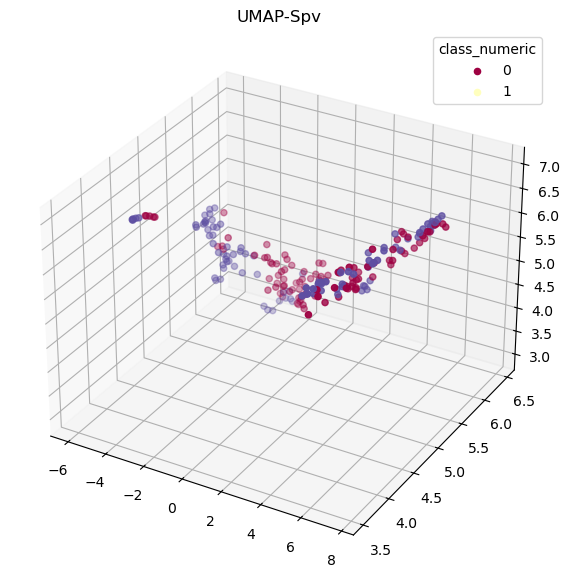

In [51]:
s_vid_UMAP = umap.UMAP(n_components=3, random_state=42)
visualize(s_vid_UMAP, PH3_S_VID_UMAP_df, label_col=sup.class_numeric_column, title=f"UMAP-{sup.DATA_S_PV}", reducer_name=sup.PH3_REDUCER_NAME_UMAP)

##### Writeout

In [52]:
writeout(umap.UMAP, sup.PH3_REDUCER_NAME_UMAP, PH3_S_VID_UMAP_df, sup.class_numeric_column, f"{sup.DATA_S_PV}")

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/reduce/umap/ exists. Continuing with execution
